In [ ]:
# Author: Md Junayed Hasan
# The goal is to fianlly process the data. This is the final threshold pipeline

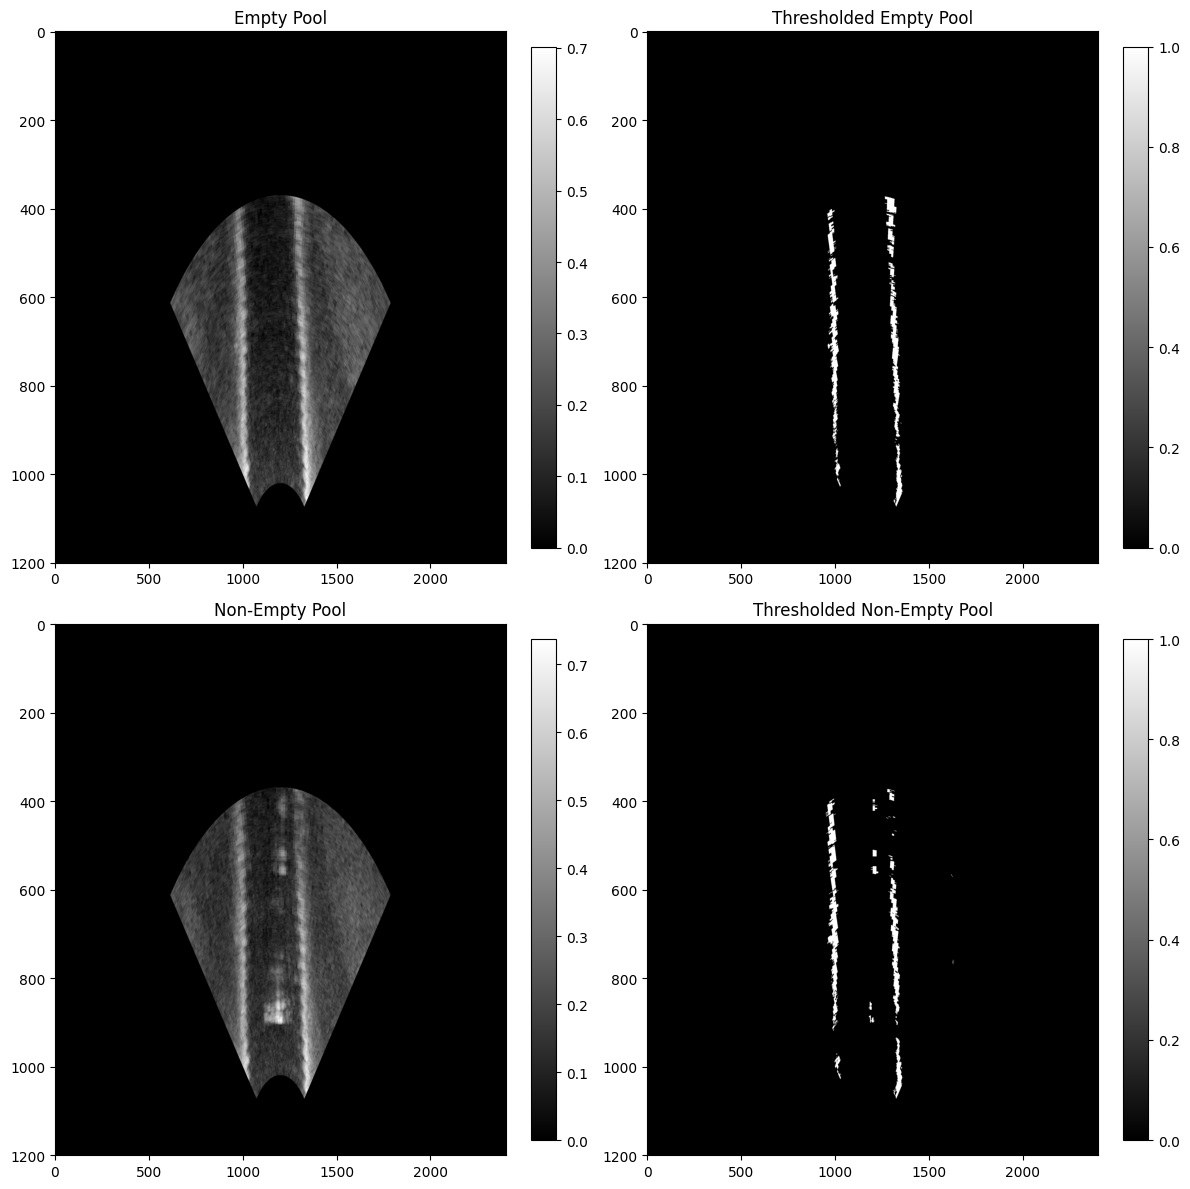

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the CSV data
emptypool = pd.read_csv('C:/Users/JH11272/Desktop/GitArch/Ping360-Capture-analysis-and-AI/Processed Data after Record/2024-03-13 15-50-16Gain_0_Results.csv')
non_emptypool = pd.read_csv('Object - Data Demo.csv') # Replace with your actual path

# Define the column index up to which to set values to zero -- based on the above explanation
user_defined_index_low = 180  
user_defined_index_high = 830

# Set all values to zero up to the specified index in all rows, excluding the angle column
emptypool.iloc[:, 1:user_defined_index_low + 1] = 0
emptypool.iloc[:, user_defined_index_high + 1:] = 0

non_emptypool.iloc[:, 1:user_defined_index_low + 1] = 0
non_emptypool.iloc[:, user_defined_index_high + 1:] = 0

# Function to calculate threshold for each column (mean + 2 * std)
def threshold_dataframe(df):
    thresholded_df = df.copy()
    for col in df.columns[1:]:  # Skip the first column (angle column)
        col_mean = df[col].mean()
        col_std = df[col].std()
        threshold_value = col_mean + 2 * col_std
        thresholded_df[col] = (df[col] > threshold_value).astype(np.uint8) * 255
    return thresholded_df

# Apply the threshold to the dataframes
emptypool_thresholded = threshold_dataframe(emptypool)
non_emptypool_thresholded = threshold_dataframe(non_emptypool)

# Polar map logic function
def create_polar_map_matrix(data, sonar_position="Bottom"):
    cells_number = data.shape[1]
    polar_map_matrix = np.zeros((cells_number, 2 * cells_number))

    if sonar_position == "Bottom":
        for i in range(data.shape[0]):  # Number of angles
            Degree_Angle = (data.iloc[i, 0] - 100) * 0.9
            for j in range(1, data.shape[1] - 1):  # Number of samples for each angle
                if i == 1:  # Adjusting for zero-based indexing
                    for k in range(91):  # 0 to 90
                        x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                        y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                        polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = data.iloc[i, j] / 255
                elif i > 1:
                    for k in range(100):  # 0 to 99
                        x = int(np.cos(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                        y = int(np.sin(np.deg2rad(Degree_Angle - 0.01 * k)) * j)
                        polar_map_matrix[abs(cells_number - y) - 1, abs(cells_number + x) - 1] = data.iloc[i, j] / 255

    return polar_map_matrix

# Create polar map matrices
emptypool_polar = create_polar_map_matrix(emptypool)
emptypool_thresholded_polar = create_polar_map_matrix(emptypool_thresholded)

non_emptypool_polar = create_polar_map_matrix(non_emptypool)
non_emptypool_thresholded_polar = create_polar_map_matrix(non_emptypool_thresholded)

# Plot the polar maps side by side
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Emptypool vs. Emptypool Thresholded
im1 = axs[0, 0].imshow(emptypool_polar, cmap='gray', aspect='auto')
axs[0, 0].set_title('Empty Pool')
fig.colorbar(im1, ax=axs[0, 0], orientation='vertical', fraction=0.05)

im2 = axs[0, 1].imshow(emptypool_thresholded_polar, cmap='gray', aspect='auto')
axs[0, 1].set_title('Thresholded Empty Pool')
fig.colorbar(im2, ax=axs[0, 1], orientation='vertical', fraction=0.05)

# Non-emptypool vs. Non-emptypool Thresholded
im3 = axs[1, 0].imshow(non_emptypool_polar, cmap='gray', aspect='auto')
axs[1, 0].set_title('Non-Empty Pool')
fig.colorbar(im3, ax=axs[1, 0], orientation='vertical', fraction=0.05)

im4 = axs[1, 1].imshow(non_emptypool_thresholded_polar, cmap='gray', aspect='auto')
axs[1, 1].set_title('Thresholded Non-Empty Pool')
fig.colorbar(im4, ax=axs[1, 1], orientation='vertical', fraction=0.05)

plt.tight_layout()
plt.show()
